##### 1.1 - SPIRALS

1. PERCEPTRON

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

In [8]:
def trainPerceptron(x,y,eta,tol,max_epocas,par):
    if par == 1:
        bias = np.ones((x.shape[0],1))
        x = np.concatenate((x,bias), axis = 1)
        
    N_perceptron = x.shape[0]
    n_perceptron = x.shape[1]
    w = np.random.rand(n_perceptron) - 0.5 
    w = np.resize(w,(w.shape[0],1))
    n_epocas = 0
    erro_epoca = 1 + tol
    evec = erro_epoca * np.ones(max_epocas)
    
    while erro_epoca > tol and n_epocas < max_epocas - 1:
        e_i2 = 0
        xseq = np.arange(N_perceptron)
        np.random.shuffle(xseq)
        
        for i in range(N_perceptron):
            i_rand = xseq[i]
            yhat_i = np.multiply(np.dot(x[i_rand],w) >= 0, 1)
            e_i = y[i_rand] - yhat_i
            dw = eta * e_i * x[i_rand]
            dw = np.resize(dw,(dw.shape[0],1))
            w = w + dw
            e_i2 = e_i2 + e_i * e_i
        
        n_epocas += 1
        evec[n_epocas] = e_i2/N_perceptron
        erro_epoca = evec[n_epocas]
        
    return w, evec[0:n_epocas]

def yPerceptron(x, w, par):
    if par == 0:
        x = np.concatenate((x,np.ones((x.shape[0],1))), axis = 1)

    w = np.resize(w, (x.shape[1],1))
    y_eval = np.dot(x,w)
    class_eval = np.squeeze(np.multiply(np.dot(x,w) >= 0, 1))
    
    return y_eval, class_eval

In [9]:
dataFrame = pd.read_csv('../data/spirals.csv')
dataFrame = shuffle(dataFrame)

In [10]:
N = len(dataFrame)

# 70% for train and 30% for test
trainSize = int(0.7*N)
testSize = N - trainSize

trainData = dataFrame.head(trainSize)
testDate = dataFrame.tail(testSize)

# data train
x1_train = trainData[trainData['classes'] == 1]['x.1'].to_numpy()
x1_train = np.resize(x1_train, (trainSize, 1))
y1_train = trainData[trainData['classes'] == 1]['x.2'].to_numpy()
y1_train = np.resize(y1_train, (trainSize, 1))

x2_train = trainData[trainData['classes'] == 2]['x.1'].to_numpy()
x2_train = np.resize(x2_train, (trainSize, 1))
y2_train = trainData[trainData['classes'] == 2]['x.2'].to_numpy()
y2_train = np.resize(y2_train, (trainSize, 1))

# data test
x1_test = testDate[testDate['classes'] == 1]['x.1'].to_numpy()
x1_test = np.resize(x1_test, (testSize, 1))
y1_test = testDate[testDate['classes'] == 1]['x.2'].to_numpy()
y1_test = np.resize(y1_test, (testSize, 1))

x2_test = testDate[testDate['classes'] == 2]['x.1'].to_numpy()
x2_test = np.resize(x2_test, (testSize, 1))
y2_test = testDate[testDate['classes'] == 2]['x.2'].to_numpy()
y2_test = np.resize(y2_test, (testSize, 1))

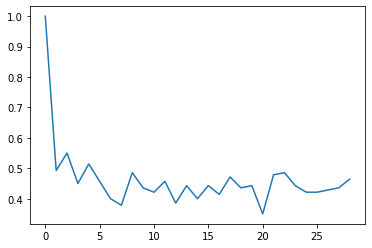

pesos: 
[[0.01323789]
 [0.00101847]
 [0.00450014]]


In [11]:
# class train
class_train_1 = 0*np.ones((x1_train.shape[0], 1))
class_train_2 = np.ones((x2_train.shape[0], 1))

class_train = np.concatenate((class_train_1, class_train_2), axis = 0)

# trains
xin_train_1 = np.concatenate((x1_train, y1_train), axis = 1)
xin_train_2 = np.concatenate((x2_train, y2_train), axis = 1)
xin_train_1_2 = np.concatenate((xin_train_1, xin_train_2), axis = 0)

eta = 0.01
tol = 1e-6
max_epocas = 30
consider_bias = 1
wt,evec = trainPerceptron(xin_train_1_2, class_train, eta, tol, max_epocas, consider_bias)

plt.plot(evec)
plt.show()
print("pesos: \n" + str(wt))


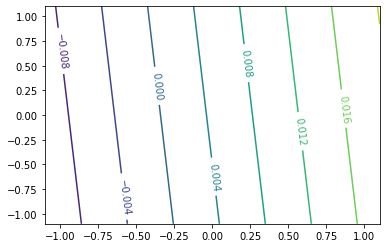

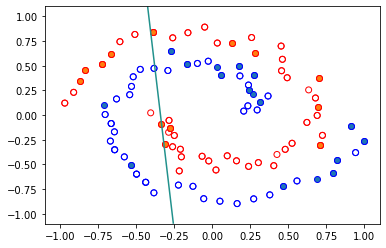

In [12]:
# matrix de pontos xy
xgrid = np.linspace(-1.1, 1.1, 250)
ygrid = np.linspace(-1.1, 1.1, 250)
xygrid = np.zeros((xgrid.shape[0]*ygrid.shape[0], 2))
xMeshGrid, yMeshGrid = np.meshgrid(xgrid, ygrid)

classMeshgrid = np.zeros((xgrid.shape[0], ygrid.shape[0]))

for i, i_pt in enumerate(xgrid):
  for j, j_pt in enumerate(ygrid):
    yd, xyClass = yPerceptron(np.array([j_pt, i_pt], ndmin = 2), wt, 0)
    classMeshgrid[i, j] = yd

###
fig, ax = plt.subplots()
CS = ax.contour(xMeshGrid, yMeshGrid, classMeshgrid)
ax.clabel(CS, inline = 1, fontsize = 10)
plt.show()

###
plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')
plt.scatter(x1_test, y1_test, color='b', facecolor='none')
plt.scatter(x2_test, y2_test, color='r', facecolor='none')
plt.legend(['Train 1', 'Train 2', 'Test 1', 'Test 2'])
plt.contour(xMeshGrid, yMeshGrid, classMeshgrid, levels = 0)
plt.show()